In [10]:
import os
if os.getcwd().endswith("Examples"):
    os.chdir('../')

from cdrift.approaches import bose
from cdrift import evaluation

from pm4py.objects.log.importer.xes import importer as xes_importer
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from pathlib import Path

# Timing
from timeit import default_timer
from datetime import datetime as dt

## Choose an Event Log ##

In [11]:
root = tk.Tk()
root.withdraw()
root.lift()

file_path = filedialog.askopenfilename(filetypes=[("XES Event Log","*.xes")])
print(f"Chosen Log: {Path(file_path).stem}")
log = xes_importer.apply(file_path)

Chosen Log: Atomic_Size2_ConditionalToSequence


parsing log, completed traces ::   0%|          | 0/2999 [00:00<?, ?it/s]

### Parameters / Constants ###

In [12]:
WINDOW_SIZE = 200
MEASURE_WINDOW = None
TRUE_CHANGEPOINTS = [999,1999]

#### Extract Time Series and Apply Sliding Window ####

In [13]:
start_j = default_timer()
p_j = bose.detectChange_JMeasure_KS(log,WINDOW_SIZE, MEASURE_WINDOW)
calc_duration_j = default_timer() - start_j
start_wc = default_timer()
p_wc = bose.detectChange_WC_KS(log,WINDOW_SIZE, MEASURE_WINDOW)
calc_duration_wc = default_timer() - start_wc

Calculating J P-Values for Bose, activity pairs complete ::   0%|          | 0/1764 [00:00<?, ?it/s]

Calculating WC P-Values for Bose, activity pairs complete ::   0%|          | 0/1764 [00:00<?, ?it/s]

### Visual Inspection ###

In [14]:
# "Trim" parameter removes the default constant ones from the sides to not influence visual inspection
cp_j = bose.visualInspection(p_j, WINDOW_SIZE)
cp_wc = bose.visualInspection(p_wc, WINDOW_SIZE)

print(f"J Measure Extraction detected {cp_j}.")
print(f"Window Count Extraction detected {cp_wc}.")

J Measure Extraction detected [962, 1951].
Window Count Extraction detected [897, 1919].


### Plotting ###

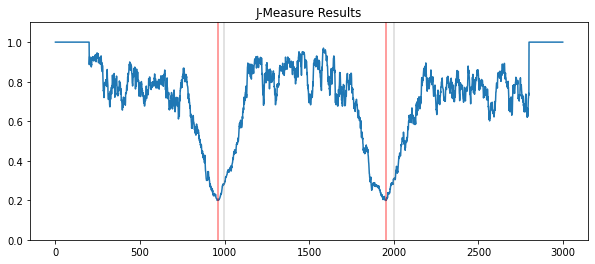

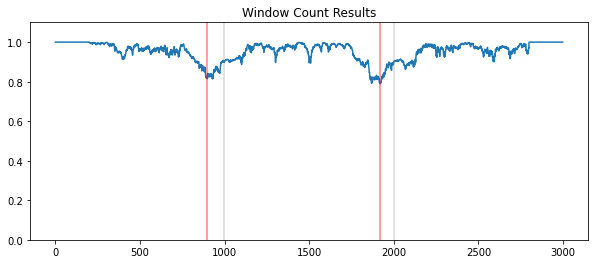

In [15]:
def plotPvals(sig, cp, known_cp, title):
    fig = plt.figure(figsize=(10,4))
    plt.plot(sig)
    for c in cp:
        plt.axvline(x=c, color="red", alpha=0.5)
    for c in known_cp:
        plt.axvline(x=c, color="grey", alpha=0.3)
    plt.ylim(0,1.1)
    plt.title(title)
    plt.show()

plotPvals(p_j,cp_j,TRUE_CHANGEPOINTS, "J-Measure Results")
plotPvals(p_wc,cp_wc,TRUE_CHANGEPOINTS, "Window Count Results")

### Evaluation ###

In [16]:
f1_j = evaluation.F1_Score(detected=cp_j, known=TRUE_CHANGEPOINTS, lag=200)
f1_wc = evaluation.F1_Score(detected=cp_wc, known=TRUE_CHANGEPOINTS, lag=200)

print(f"J Measure Extraction detected {cp_j} with an F1-Score of {f1_j}. This took {dt.strftime(dt.utcfromtimestamp(calc_duration_j), '%H:%M:%S')}.")
print(f"Window Count Extraction detected {cp_wc} with an F1-Score of {f1_wc}. This took {dt.strftime(dt.utcfromtimestamp(calc_duration_wc), '%H:%M:%S')}.")
print(f"\nJ Measure Average Lag: {evaluation.get_avg_lag(detected_changepoints=cp_j, actual_changepoints=TRUE_CHANGEPOINTS, lag=200)} (Cases)")
print(f"Window Count Average Lag: {evaluation.get_avg_lag(detected_changepoints=cp_wc, actual_changepoints=TRUE_CHANGEPOINTS, lag=200)} (Cases)")

J Measure Extraction detected [962, 1951] with an F1-Score of 1.0. This took 00:11:14.
Window Count Extraction detected [897, 1919] with an F1-Score of 1.0. This took 00:09:42.

J Measure Average Lag: 42.5 (Cases)
Window Count Average Lag: 91.0 (Cases)
